In [114]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.api as sm

from scipy.stats import ranksums

### Prosody Feats

In [115]:

import numpy as np
from sklearn import metrics
import sklearn


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [116]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [117]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista


def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
         


In [118]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected


In [119]:
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NEUROVOZ/Acoustic/Prosody/whole_prosody.csv')
prosody = prosody.drop(columns=['Unnamed: 0'])
prosody['task'] = [elem.split("_")[1] for elem in prosody['id'].tolist()]

gr = prosody.groupby("task")
esp = gr.get_group('ESPONTANEA')
conc = gr.get_group('concatenateread')
tot_or = pd.concat([esp, conc])
prosody = tot_or.sort_values('id')





In [120]:

intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NEUROVOZ/Acoustic/Prosody/Harmonics.csv')
intensity = intensity.drop(columns=['Unnamed: 0'])
intensity = intensity.sort_values('sound_filepath')
prosody['intensity'] = intensity['stddev_intensity'].tolist()

#prosody.to_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NEUROVOZ/Acoustic/complete_audio.csv")

In [121]:
prosody = prosody.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

In [122]:
all_ = prosody['id'].tolist()

In [123]:
tasks=[]
label__ =[]
for every in all_:
    tasks.append(every.split("_")[1])#.split("_")
    label__.append(every.split("_")[0])
prosody['task'] = tasks
prosody['labels']=label__
    

In [124]:
task_grouped_ = prosody.groupby("task")
concatenateread = task_grouped_.get_group("concatenateread")
#ACAMPADA = task_grouped_.get_group("ACAMPADA") 
ESPONTANEA = task_grouped_.get_group("ESPONTANEA")

## Monologue

In [125]:
ESPONTANEA = ESPONTANEA.drop(columns=['task', 'id', 'F0skew'])

task = ESPONTANEA.columns[1:-1].values.tolist()

grouped = ESPONTANEA.groupby("labels") #here we extract the values by category

control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")

parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(ESPONTANEA.columns[1:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(ESPONTANEA.columns[1:-1])])


with open('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/PROSODY/Results/mon.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

    
kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/PROSODY/Results/mon.txt')
holm_correction(kruskal_1)



([], [])

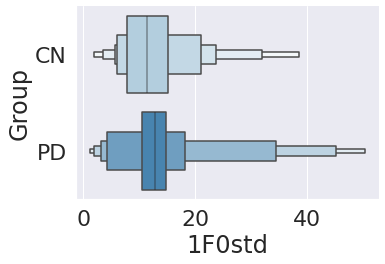

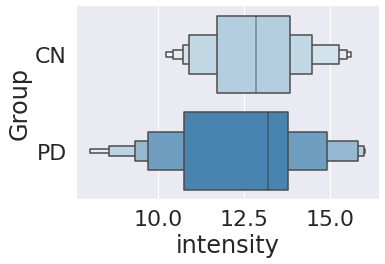

In [126]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/Plots_Prosody/{nome}', facecolor='white', dpi=600)

## Text dependent utterances (TDUs)

In [127]:

concatenateread = concatenateread.drop(columns=['task', 'id', 'F0skew'])
grouped = concatenateread.groupby("labels") #here we extract the values by category

control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")

task = concatenateread.columns[1:-1].values.tolist()

parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(concatenateread.columns[1:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(concatenateread.columns[1:-1])])




with open('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/PROSODY/Results/conc.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

    
kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/SPANISH/ACOUSTIC/PROSODY/Results/conc.txt')
holm_correction(kruskal_1)


([], [])